In [15]:
import pandas as pd
import numpy as np

In [16]:
pd.Timestamp('23/01/2005 10:00:00')

Timestamp('2005-01-23 10:00:00')

In [17]:
pd.DatetimeIndex([pd.Timestamp('23/01/2005 10:00:00'),pd.Timestamp('24/11/2045 10:45:00')])

DatetimeIndex(['2005-01-23 10:00:00', '2045-11-24 10:45:00'], dtype='datetime64[ns]', freq=None)

In [18]:
pd.date_range(start='23/01/2022',end='24/09/2024')

DatetimeIndex(['2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
               '2022-01-31', '2022-02-01',
               ...
               '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-18',
               '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22',
               '2024-09-23', '2024-09-24'],
              dtype='datetime64[ns]', length=976, freq='D')

In [19]:
pd.date_range(start='23/01/2022',end='24/09/2024',freq='W')

DatetimeIndex(['2022-01-23', '2022-01-30', '2022-02-06', '2022-02-13',
               '2022-02-20', '2022-02-27', '2022-03-06', '2022-03-13',
               '2022-03-20', '2022-03-27',
               ...
               '2024-07-21', '2024-07-28', '2024-08-04', '2024-08-11',
               '2024-08-18', '2024-08-25', '2024-09-01', '2024-09-08',
               '2024-09-15', '2024-09-22'],
              dtype='datetime64[ns]', length=140, freq='W-SUN')

In [20]:
s = pd.Series(['2023/01/06','2024/09/09','2023/5/7'])
z = pd.to_datetime(s)
z

,0
0,2023-01-06
1,2024-09-09
2,2023-05-07


In [21]:
z.dt.month

,0
0,1
1,9
2,5


In [22]:
z.dt.month_name()

,0
0,January
1,September
2,May


In [23]:
t1 = pd.Timestamp('6th january 2023 8:20:14')
t2 = pd.Timestamp('26th january 2023 10:00:00')
t2 - t1

Timedelta('20 days 01:39:46')

In [24]:
pd.Timedelta(days=2)

Timedelta('2 days 00:00:00')

In [25]:
pd.Timedelta(days = 2 ,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [26]:
pd.Timestamp('6th jan 2023') + pd.Timedelta(days = 2 ,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [27]:
pd.date_range(start='2023/01/06',end='2023/01/31',freq='D') + pd.Timedelta(days = 2 ,hours=10,minutes=35)

DatetimeIndex(['2023-01-08 10:35:00', '2023-01-09 10:35:00',
               '2023-01-10 10:35:00', '2023-01-11 10:35:00',
               '2023-01-12 10:35:00', '2023-01-13 10:35:00',
               '2023-01-14 10:35:00', '2023-01-15 10:35:00',
               '2023-01-16 10:35:00', '2023-01-17 10:35:00',
               '2023-01-18 10:35:00', '2023-01-19 10:35:00',
               '2023-01-20 10:35:00', '2023-01-21 10:35:00',
               '2023-01-22 10:35:00', '2023-01-23 10:35:00',
               '2023-01-24 10:35:00', '2023-01-25 10:35:00',
               '2023-01-26 10:35:00', '2023-01-27 10:35:00',
               '2023-01-28 10:35:00', '2023-01-29 10:35:00',
               '2023-01-30 10:35:00', '2023-01-31 10:35:00',
               '2023-02-01 10:35:00', '2023-02-02 10:35:00'],
              dtype='datetime64[ns]', freq='D')

In [28]:
df = pd.read_csv('/content/deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [29]:
df.shape

(501, 2)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [31]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

<ipython-input-31-481df77f7c5d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])
<ipython-input-31-481df77f7c5d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivery_date'] = pd.to_datetime(df['delivery_date'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [33]:
df['delivery_time_period'] = df['delivery_date'] - df['order_date']

In [34]:
df.head()

,order_date,delivery_date,delivery_time_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [35]:
df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

In [36]:
google = pd.read_csv('/content/google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [37]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [38]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [39]:
google['Date'] = pd.to_datetime(google['Date'])

In [40]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [41]:
google.set_index('Date',inplace=True)

In [42]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [43]:
google.loc['23/08/2004']

,2004-08-23
Open,5.516822e+01
High,5.652812e+01
Low,5.432139e+01
Close,5.449574e+01
Adj Close,5.449574e+01
Volume,1.834290e+07


In [44]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [45]:
google.loc['23/08/2004']

,2004-08-23
Open,55.17
High,56.53
Low,54.32
Close,54.50
Adj Close,54.50
Volume,18342897.00


In [46]:
google.loc['2021-12-30']

,2021-12-30
Open,2929.00
High,2941.25
Low,2915.17
Close,2920.05
Adj Close,2920.05
Volume,648900.00


In [47]:
google.loc['2013/4']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-01,396.02,399.63,395.14,399.10,399.10,3628148
2013-04-02,400.77,405.89,400.50,405.00,405.00,4098304
2013-04-03,405.21,405.58,398.84,401.59,401.59,3490033
2013-04-04,400.62,401.37,394.17,396.05,396.05,4913548
2013-04-05,391.56,392.03,386.75,390.06,390.06,6893542
2013-04-08,387.92,388.32,382.77,385.98,385.98,5685431
2013-04-09,386.30,390.41,385.11,387.37,387.37,4330772
2013-04-10,390.00,394.70,386.55,393.61,393.61,3972033
2013-04-11,394.96,395.07,390.57,393.72,393.72,4072608


In [48]:
google.loc['2014']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,555.65,556.79,552.06,554.48,554.48,3656454
2014-01-03,555.42,556.38,550.40,550.44,550.44,3345894
2014-01-06,554.43,557.34,551.15,556.57,556.57,3551864
2014-01-07,560.40,567.72,558.49,567.30,567.30,5124336
2014-01-08,570.86,571.52,564.53,568.48,568.48,4501811
...,...,...,...,...,...,...
2014-12-24,529.06,530.30,525.58,527.32,527.32,705933
2014-12-26,527.32,532.79,525.87,532.57,532.57,1040549
2014-12-29,530.73,534.01,528.56,528.88,528.88,2278539


In [49]:
google['month_name'] = google.index.month_name()
google['week_day_name'] = google.index.day_name()
google['quarter_name'] = google.index.quarter

In [50]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2004-08-19,49.81,51.84,47.80,49.98,49.98,44871361,August,Thursday,3
2004-08-20,50.32,54.34,50.06,53.95,53.95,22942874,August,Friday,3
2004-08-23,55.17,56.53,54.32,54.50,54.50,18342897,August,Monday,3
2004-08-24,55.41,55.59,51.59,52.24,52.24,15319808,August,Tuesday,3
2004-08-25,52.28,53.80,51.75,52.80,52.80,9232276,August,Wednesday,3


In [51]:
google.loc['2015/12/15':'2016/3/12']

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2015-12-15,753.00,758.08,743.01,743.40,743.40,2666200,December,Tuesday,4
2015-12-16,750.00,760.59,739.43,758.09,758.09,1993300,December,Wednesday,4
2015-12-17,762.42,762.68,749.00,749.43,749.43,1553400,December,Thursday,4
2015-12-18,746.51,754.13,738.15,739.31,739.31,3148700,December,Friday,4
2015-12-21,746.13,750.00,740.00,747.77,747.77,1525700,December,Monday,4
2015-12-22,751.65,754.85,745.53,750.00,750.00,1365400,December,Tuesday,4
2015-12-23,753.47,754.21,744.00,750.31,750.31,1565900,December,Wednesday,4
2015-12-24,749.55,751.35,746.62,748.40,748.40,527200,December,Thursday,4
2015-12-28,752.92,762.99,749.52,762.51,762.51,1515300,December,Monday,4


In [52]:
google.loc['2015/12/15':'2016/3/12':30]

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2015-12-15,753.00,758.08,743.01,743.40,743.40,2666200,December,Tuesday,4
2016-01-29,731.53,744.99,726.80,742.95,742.95,3474300,January,Friday,1


In [53]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2004-08-19,49.81,51.84,47.80,49.98,49.98,44871361,August,Thursday,3
2004-08-20,50.32,54.34,50.06,53.95,53.95,22942874,August,Friday,3
2004-08-23,55.17,56.53,54.32,54.50,54.50,18342897,August,Monday,3
2004-08-24,55.41,55.59,51.59,52.24,52.24,15319808,August,Tuesday,3
2004-08-25,52.28,53.80,51.75,52.80,52.80,9232276,August,Wednesday,3


In [54]:
google.tail()

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2022-05-16,2307.68,2332.15,2286.70,2295.85,2295.85,1164100,May,Monday,2
2022-05-17,2344.55,2344.55,2306.75,2334.03,2334.03,1078800,May,Tuesday,2
2022-05-18,2304.75,2313.91,2242.84,2248.02,2248.02,1399100,May,Wednesday,2
2022-05-19,2236.82,2271.75,2209.36,2214.91,2214.91,1459600,May,Thursday,2
2022-05-20,2241.71,2251.00,2127.46,2186.26,2186.26,1878100,May,Friday,2


In [55]:
pd.date_range(start='2005-01-6',end='2022-1-6',freq=pd.DateOffset(years=1))

DatetimeIndex(['2005-01-06', '2006-01-06', '2007-01-06', '2008-01-06',
               '2009-01-06', '2010-01-06', '2011-01-06', '2012-01-06',
               '2013-01-06', '2014-01-06', '2015-01-06', '2016-01-06',
               '2017-01-06', '2018-01-06', '2019-01-06', '2020-01-06',
               '2021-01-06', '2022-01-06'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

In [56]:
google[google.index.isin(pd.date_range(start='2005-01-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2005-01-06,97.18,97.58,93.51,93.92,93.92,20852067,January,Thursday,1
2006-01-06,227.58,234.37,225.77,231.96,231.96,35646914,January,Friday,1
2009-01-06,165.87,169.76,162.59,166.41,166.41,12898566,January,Tuesday,1
2010-01-06,311.76,311.76,302.05,302.99,302.99,7987226,January,Wednesday,1
2011-01-06,304.20,308.06,303.89,305.60,305.60,4131026,January,Thursday,1
2012-01-06,328.34,328.77,323.68,323.80,323.80,5405987,January,Friday,1
2014-01-06,554.43,557.34,551.15,556.57,556.57,3551864,January,Monday,1
2015-01-06,513.59,514.76,499.68,500.59,500.59,2899940,January,Tuesday,1
2016-01-06,730.00,747.18,728.92,743.62,743.62,1947000,January,Wednesday,1


<Axes: xlabel='Date'>

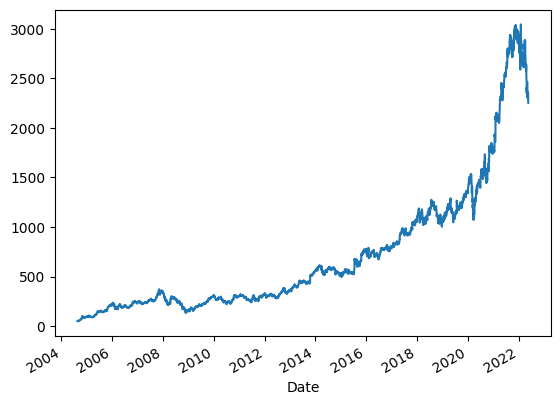

In [57]:
google['High'].plot()

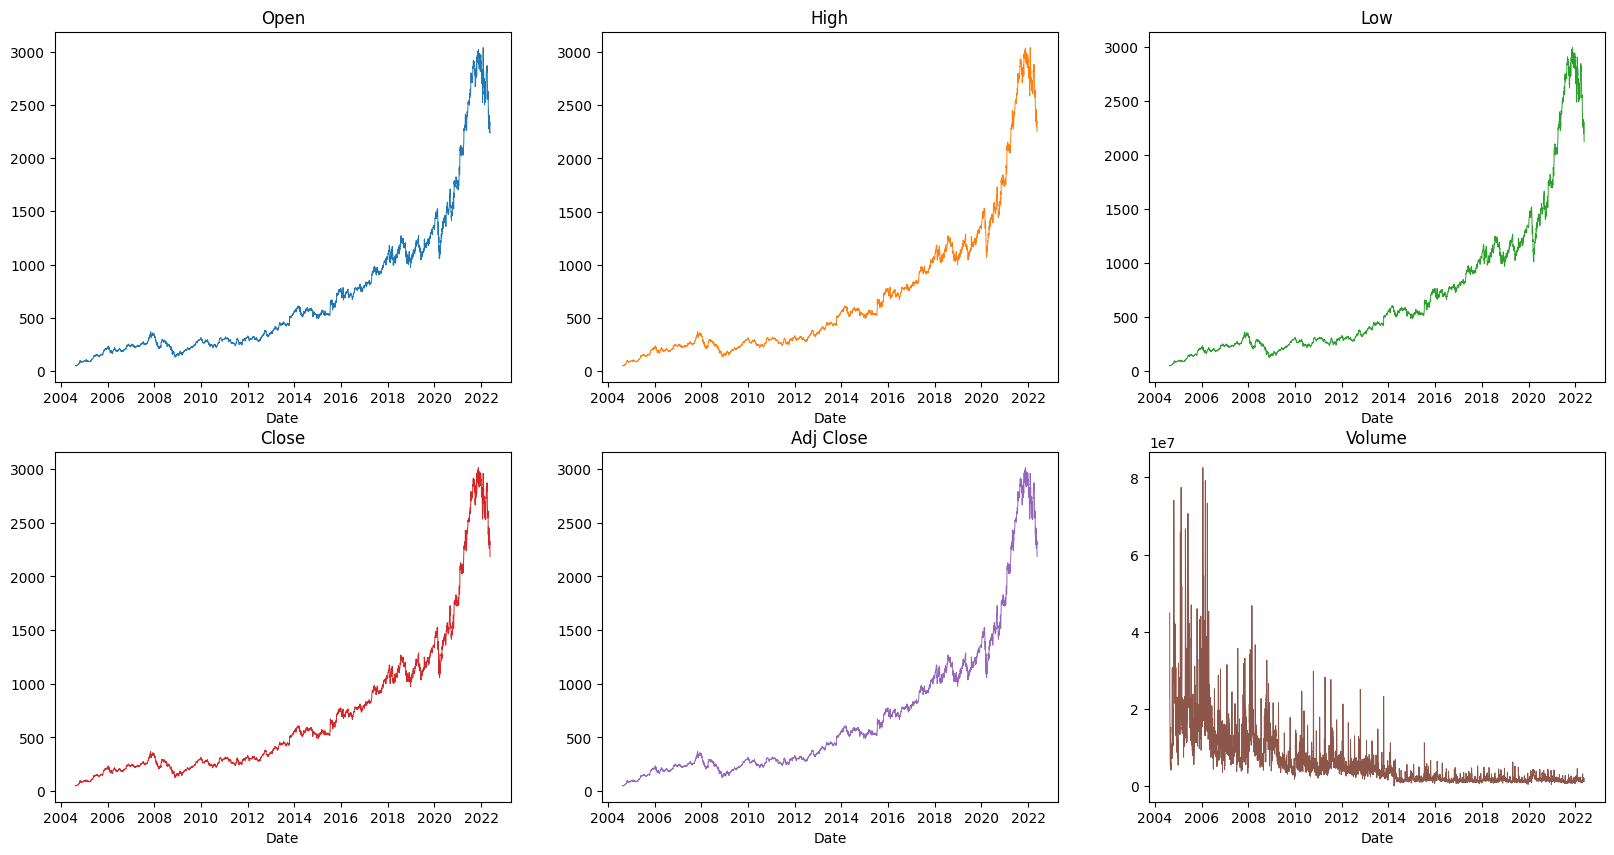

In [58]:
subset_google = google[['Open','High','Low','Close','Adj Close','Volume']]
ax =subset_google.plot(subplots=True,
                 layout=(2,3),
                 sharex=False,
                 sharey=False,
                 linewidth=0.7,
                 fontsize=10,
                 legend=False,
                 figsize=(20,10),
                 title=['Open','High','Low','Close','Adj Close','Volume'])

<Axes: xlabel='Date'>

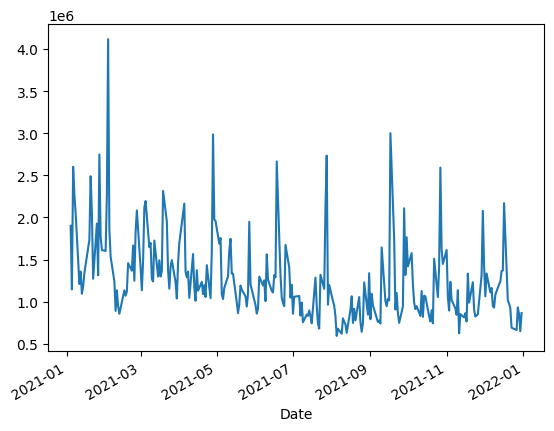

In [59]:
google.loc['2021']['Volume'].plot()

<Axes: xlabel='Date'>

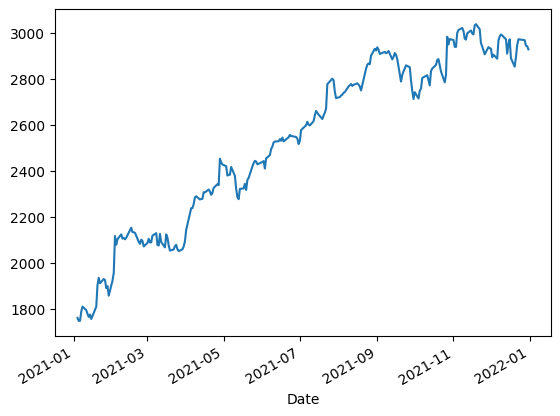

In [60]:
google.loc['2021']['High'].plot()

<Axes: xlabel='Date'>

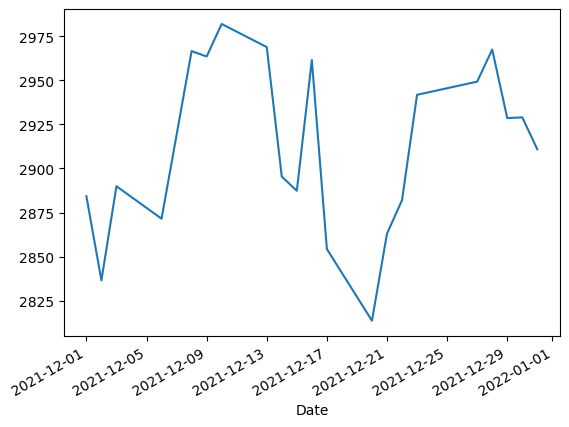

In [61]:
google.loc['2021/12']['Open'].plot()

<Axes: xlabel='Date'>

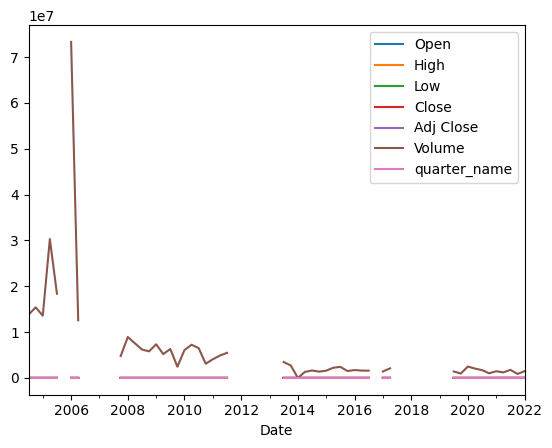

In [62]:
google.asfreq('Q').plot()

In [63]:
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [64]:
google = google.asfreq('Q',method='ffill')

In [65]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2004-09-30,64.71,65.90,64.26,64.56,64.56,13823420,September,Thursday,3
2004-12-31,99.24,99.57,95.92,96.04,96.04,15394487,December,Friday,4
2005-03-31,88.64,90.36,88.49,89.92,89.92,13587941,March,Thursday,1
2005-06-30,146.62,148.91,144.98,146.53,146.53,30301955,June,Thursday,2
2005-09-30,156.52,158.16,155.56,157.64,157.64,18371203,September,Friday,3
...,...,...,...,...,...,...,...,...,...
2021-03-31,2059.12,2093.33,2056.75,2068.63,2068.63,1459900,March,Wednesday,1
2021-06-30,2513.07,2516.00,2495.15,2506.32,2506.32,1200300,June,Wednesday,2
2021-09-30,2686.50,2711.80,2660.00,2665.31,2665.31,1764700,September,Thursday,3


<Axes: xlabel='month_name'>

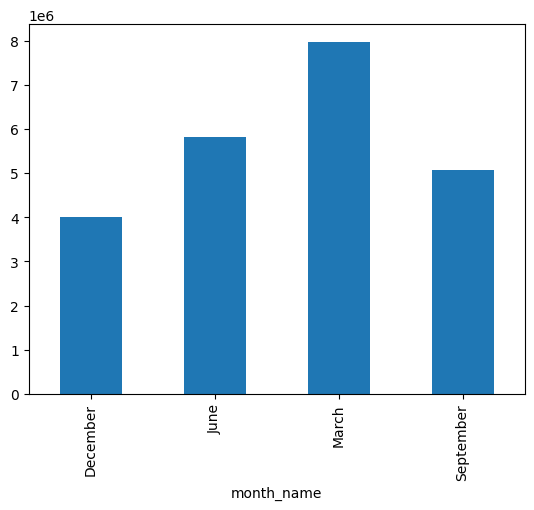

In [66]:
google.groupby('month_name')['Volume'].mean().plot(kind='bar')

<Axes: xlabel='week_day_name'>

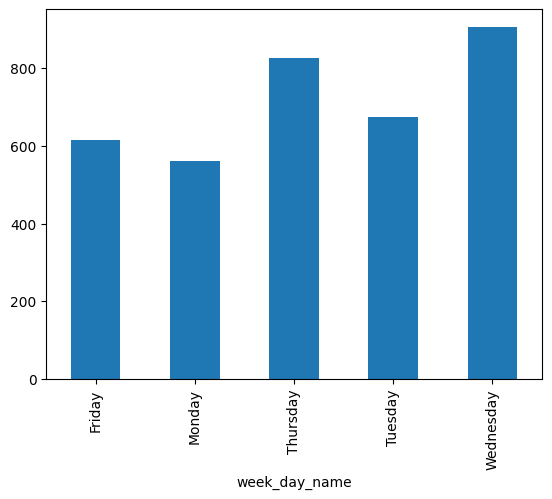

In [67]:
google.groupby('week_day_name')['High'].mean().plot(kind='bar')

<Axes: xlabel='month_name'>

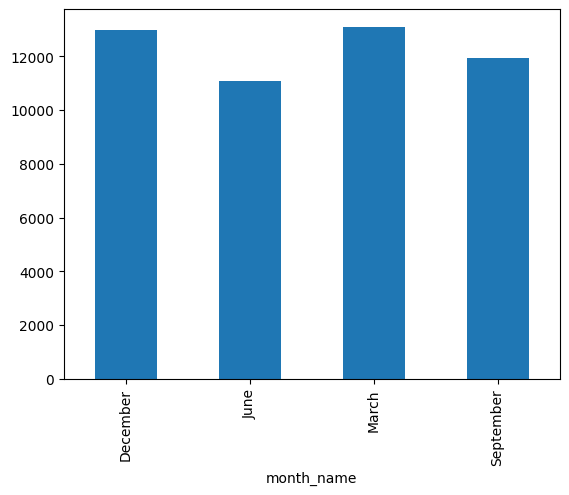

In [68]:
google.groupby('month_name')['Close'].sum().plot(kind='bar')

In [74]:
pd.set_option('display.float_format', '{:.2f}'.format)

<Axes: xlabel='Date'>

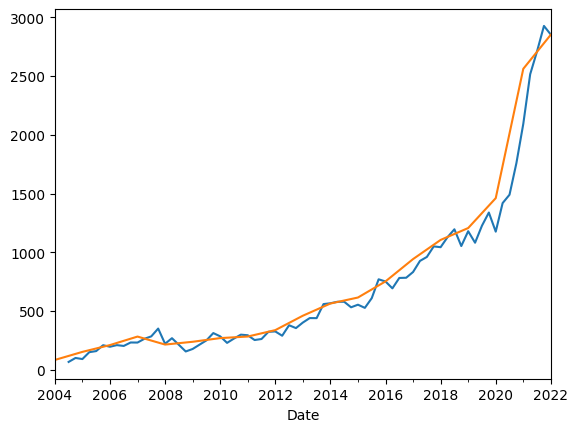

In [98]:
google['High'].plot()
google['High'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

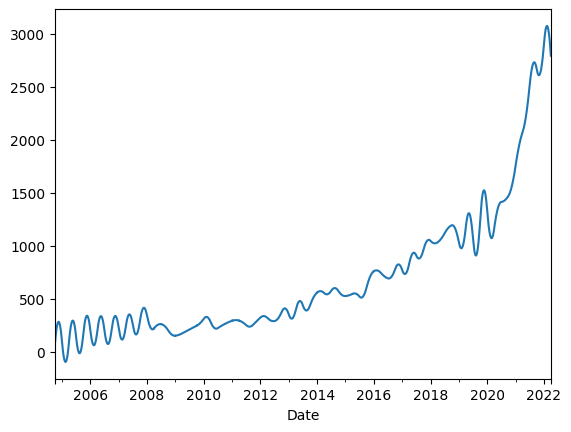

In [103]:
google['Close'].resample('12H').interpolate(method='spline',order=2).plot()

<Axes: xlabel='Date'>

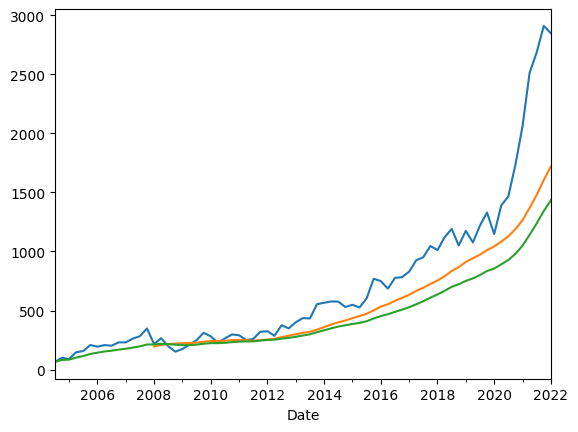

In [117]:
google['Open'].plot()
google['Open'].rolling(15).mean().plot()
google['Close'].ewm(15).mean().plot()

In [119]:
google

,Open,High,Low,Close,Adj Close,Volume,month_name,week_day_name,quarter_name
Date,,,,,,,,,
2004-09-30,64.71,65.90,64.26,64.56,64.56,13823420,September,Thursday,3
2004-12-31,99.24,99.57,95.92,96.04,96.04,15394487,December,Friday,4
2005-03-31,88.64,90.36,88.49,89.92,89.92,13587941,March,Thursday,1
2005-06-30,146.62,148.91,144.98,146.53,146.53,30301955,June,Thursday,2
2005-09-30,156.52,158.16,155.56,157.64,157.64,18371203,September,Friday,3
...,...,...,...,...,...,...,...,...,...
2021-03-31,2059.12,2093.33,2056.75,2068.63,2068.63,1459900,March,Wednesday,1
2021-06-30,2513.07,2516.00,2495.15,2506.32,2506.32,1200300,June,Wednesday,2
2021-09-30,2686.50,2711.80,2660.00,2665.31,2665.31,1764700,September,Thursday,3


In [120]:
google['Close'].shift(1)

,Close
Date,
2004-09-30,NaN
2004-12-31,64.56
2005-03-31,96.04
2005-06-30,89.92
2005-09-30,146.53
...,...
2021-03-31,1751.88
2021-06-30,2068.63
2021-09-30,2506.32


In [121]:
google['Close'].shift(-1)

,Close
Date,
2004-09-30,96.04
2004-12-31,89.92
2005-03-31,146.53
2005-06-30,157.64
2005-09-30,206.66
...,...
2021-03-31,2506.32
2021-06-30,2665.31
2021-09-30,2893.59


In [128]:
df = pd.read_csv('login.csv',header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [131]:
user_df = df[df['user_id'] == 413]
user_df.head()

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45


In [133]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    int64         
 1   login_time  222 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.3 KB


<ipython-input-133-fd41e73e6ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [138]:
user_df['shifted'] = user_df['login_time'].shift(1)
(user_df['login_time'] - user_df['shifted']).mean()

<ipython-input-138-091b95be4a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


Timedelta('1 days 15:05:13.384615384')